In [22]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [23]:

data_promo = {
    "Experience_Years": [2,4,5,3,6,5],
    "Performance_Rating": [3,4,5,3,4,4],
     "Promoted": ["No", "Yes", "Yes", "No", "Yes", None]
}

In [24]:
df_promo = pd.DataFrame(data_promo)

# Step 2: Clean the data (remove rows with missing values)
train_df = df_promo.dropna()

In [25]:
train_df

,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes


In [26]:
#split data(find input and output)
X = train_df[['Experience_Years','Performance_Rating']]
y = train_df['Promoted']

In [27]:
#create the model
model = DecisionTreeClassifier()

In [28]:
#train the model
model.fit(X,y)

DecisionTreeClassifier()

In [30]:
# predict
pred_promote = model.predict([[5, 4]])
print("Promotion prediction:", pred_promote[0])


Promotion prediction: Yes


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


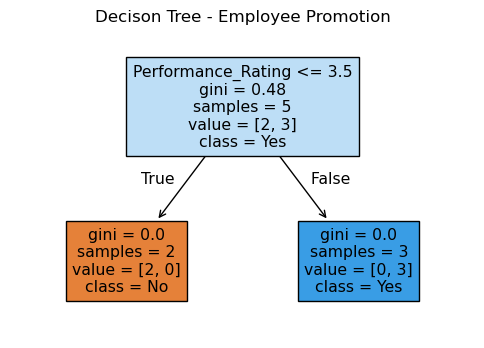

In [35]:
plt.figure(figsize = (6,4))
plot_tree(model,
    feature_names = ['Experience_Years','Performance_Rating'],
    class_names = ['No','Yes'],
    filled=True)
plt.title('Decison Tree - Employee Promotion')
plt.show()

## take the exp.years and performance rating from user and display Promoted or not using prediction
## write code in this way, tthere should ve not warning message
## exp_years=
## per_ratings=
## print('Promoted',)

In [37]:
exp_years = float(input("Enter experience years: "))
per_ratings = float(input("Enter performance rating: "))

Enter experience years:  2
Enter performance rating:  5


In [38]:
# Predict promotion
pred_promote = model.predict([[exp_years, per_ratings]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
# Display result
print("Promoted:", pred_promote[0])

Promoted: Yes


In [40]:
# Take user input
exp_years = float(input("Enter experience years: "))
per_ratings = float(input("Enter performance rating: "))

pred_promote = model.predict([[exp_years, per_ratings]]) # Predict promotion

print("Promoted:", pred_promote[0]) # Display result

Enter experience years:  2
Enter performance rating:  5


Promoted: Yes


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [41]:
# One more example on DecisionTreeClassifier

In [42]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [46]:
data = {'Age': [25,30,45,35,22,40,50],
       'Income': ['Low','Medium','High','Medium','Low','High','High'],
        'Buy': ['No','No','Yes','Yes','No','Yes','Yes']
       }
df = pd.DataFrame(data)
df

,Age,Income,Buy
0,25,Low,No
1,30,Medium,No
2,45,High,Yes
3,35,Medium,Yes
4,22,Low,No
5,40,High,Yes
6,50,High,Yes


In [50]:
# Encode categorical features
encoder = OneHotEncoder(sparse_output=False)
income_encoded = encoder.fit_transform(df[['Income']])
income_encoded_df = pd.DataFrame(income_encoded, columns=encoder.get_feature_names_out(['Income']))
income_encoded_df

,Income_High,Income_Low,Income_Medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0


In [51]:
label_encoder = LabelEncoder()
df['Buy'] = label_encoder.fit_transform(df['Buy'])

In [52]:
df_encoded = pd.concat([df[['Age','Buy']], income_encoded_df],axis=1)
df_encoded

,Age,Buy,Income_High,Income_Low,Income_Medium
0,25,0,0.0,1.0,0.0
1,30,0,0.0,0.0,1.0
2,45,1,1.0,0.0,0.0
3,35,1,0.0,0.0,1.0
4,22,0,0.0,1.0,0.0
5,40,1,1.0,0.0,0.0
6,50,1,1.0,0.0,0.0


In [54]:
#  split data
X = df_encoded.drop('Buy',axis=1)
y = df_encoded['Buy']

X,y

(   Age  Income_High  Income_Low  Income_Medium
 0   25          0.0         1.0            0.0
 1   30          0.0         0.0            1.0
 2   45          1.0         0.0            0.0
 3   35          0.0         0.0            1.0
 4   22          0.0         1.0            0.0
 5   40          1.0         0.0            0.0
 6   50          1.0         0.0            0.0,
 0    0
 1    0
 2    1
 3    1
 4    0
 5    1
 6    1
 Name: Buy, dtype: int64)

In [57]:
model = DecisionTreeClassifier()

In [58]:
model.fit(X,y)

DecisionTreeClassifier()

In [60]:
sample = pd.DataFrame({'Age': [28], 'Income': ['Medium']})
sample_encoded = encoder.transform(sample[['Income']])

sample_encoded_df = pd.DataFrame(sample_encoded, columns=encoder.get_feature_names_out(['Income']))

sample_final = pd.concat([sample[['Age']], sample_encoded_df], axis=1)

prediction = model.predict(sample_final)
predicted_label = label_encoder.inverse_transform(prediction)

print('Prediction for Age=28, Income=Medium ', predicted_label[0])

Prediction for Age=28, Income=Medium  No


In [62]:
person_ages = int(input('Enter Age'))
person_income = input('Enter category Low, Medium or High')
person = pd.DataFrame({'Age':[person_age],'Income':[person_income]})
person_encoded = encoder.transform(person[['Income']])

person_encoded_df = pd.DataFrame(person_encoded, columns=encoder.get_feature_names_out(['Income']))
person_final = pd.concat([person[['Age']], person_encoded_df],axis=1)
prediction = model.predict(person_final)
predicted_label = label_encoder.inverse_transform(prediction)
print(f'Prediction for age={person_age}, Income={person_income} ', predicted_label[0])

Enter Age 30
Enter category Low, Medium or High High


NameError: name 'person_age' is not defined

In [ ]:
plt.figure(figsize=(10,6))
plot_tree(model,feature_names=X.columns, class_names=['No','Yes'],filled=True)
